In [25]:
import json  
import pandas as pd 
from pandas import json_normalize 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
with open('C:\\Users\\ineso\\FEUP-3ano\\gulbenkian-ai\\YelpDatasetKaggle\\yelp_academic_dataset_business.json', encoding='utf-8') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")
businesses = json_normalize(data)

In [46]:
users = pd.DataFrame()
count = 0
with open('C:\\Users\\ineso\\FEUP-3ano\\gulbenkian-ai\\YelpDatasetKaggle\\yelp_academic_dataset_user.json', encoding='utf-8') as f2:
    for line in f2:
        if count < 100:
            line_contents = json.loads(line)
            users = users.append(json_normalize(line_contents)[['user_id', 'name', 'friends']])
            count+=1
        else: break

users.shape

(100, 3)

In [55]:
reviews = pd.DataFrame()
count = 0
with open('C:\\Users\\ineso\\FEUP-3ano\\gulbenkian-ai\\YelpDatasetKaggle\\yelp_academic_dataset_review.json', encoding='utf-8') as f3:
    for line in f3:
        if count < 100:
            line_contents = json.loads(line)
            reviews = reviews.append(json_normalize(line_contents)[['review_id', 'user_id', 'business_id']])
            count+=1
        else: break

reviews.head

<bound method NDFrame.head of                  review_id                 user_id             business_id
0   xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw
0   UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ
0   LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ
0   i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q
0   6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A
..                     ...                     ...                     ...
0   TxpuxIkumA95x3qEgB-AaA  CGZD3Xkg7JsBIELPXyLzZg  CIdyd88FK-4-YaEFo3Ht6A
0   gHi_lCvO0659TOUGyZwPvA  STcrjP1twU03Vk6syLft7g  zRJBKJkEheN30Vl_fdiS7g
0   6f8govVUNZf5Gi-UiRv7vA  ktZxmBGBEnWLyecg0X4uVw  6M5WG1Hp38dsYkK77S-bzQ
0   0ID7sVxBNa7nBmsSo9cNOw  XBRgHoPjOi4GgcYFCvYElQ  osSwv6CJy5hDKQdOKeyTow
0   _1cKUxp1Ii5yGj000S-RnQ  bolI1wtWAvn7tzEZ5k2UJw  lslPZKTjaG9vhfINJ9acFA

[100 rows x 3 columns]>

In [ ]:
b_df = businesses.head(100)
b_df.shape

In [60]:
G = nx.MultiDiGraph()
for index, row in b_df.iterrows():
    G.add_node(row['business_id'], name=row['name'], type="business")
    if row['categories'] != None:
        cat = row['categories'].split(", ")
        for c in cat:
            if c not in list(G.nodes):
                G.add_node(c, type="category")
            G.add_edge(row['business_id'], c)

KeyboardInterrupt: 

In [58]:
for index, row in users.iterrows():
    G.add_node(row['user_id'], name=row['name'], type="user")

for index, row in users.iterrows():
    friends = row['friends'].split(", ")
    for f in friends:
        if f in list(G.nodes):
            G.add_edge(row['user_id'], f)

In [59]:
for index, row in reviews.iterrows():
    if row['user_id'] in list(G.nodes) and row['business_id'] in list(G.nodes):
        G.add_edge(row['user_id'], row['business_id'])
        print("yay")

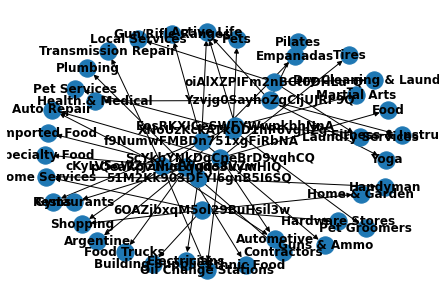

In [10]:
nx.draw(G, with_labels=True, font_weight='bold')

{'f9NumwFMBDn751xgFiRbNA': Text(-0.4213695197373737, 0.26082635424146333, 'The Range At Lake Norman'),
 'Yzvjg0SayhoZgCljUJRF9Q': Text(0.3439409721214945, 0.10137255467188437, 'Carlos Santo, NMD'),
 'XNoUzKckATkOD1hP6vghZg': Text(-0.48182900612594, -0.30593295755166444, 'Felinus'),
 '6OAZjbxqM5ol29BuHsil3w': Text(-0.31219541242488297, 0.269938940644742, 'Nevada House of Hose'),
 '51M2Kk903DFYI6gnB5I6SQ': Text(-0.5843771973286737, -0.4473305098517284, 'USE MY GUY SERVICES LLC'),
 'cKyLV5oWZJ2NudWgqs8VZw': Text(0.47899181575163136, 0.09458468718825248, 'Oasis Auto Center - Gilbert'),
 'oiAlXZPIFm2nBCt0DHLu_Q': Text(-0.05663122665038488, 0.01566095262973297, 'Green World Cleaners'),
 'ScYkbYNkDgCneBrD9vqhCQ': Text(0.5034137558777262, 0.03813341682005918, 'Junction Tire & Auto Service'),
 'pQeaRpvuhoEqudo3uymHIQ': Text(0.2046051091130233, -0.09118776143096201, 'The Empanadas House'),
 'EosRKXIGeSWFYWwpkbhNnA': Text(0.12944756621543368, 0.2782712513857176, 'Xtreme Couture'),
 'Active Life':

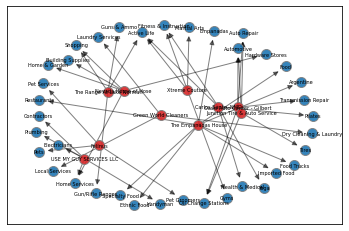

In [21]:
blist = []
clist = []
for n in list(G.nodes):
    if G.nodes[n]['type'] == 'business':
        blist.append(n)
    elif G.nodes[n]['type'] == 'category': 
        clist.append(n)

pos = nx.spring_layout(G, seed=3113794652)
options = {"edgecolors": "tab:gray", "node_size": 100, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=blist, node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=clist, node_color="tab:blue", **options)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

labels = {}
for n in blist:
    labels[n] = G.nodes[n]['name']
for n in clist:
    labels[n] = n
nx.draw_networkx_labels(G, pos, labels, font_size=5)

In [22]:
G.degree()

DiMultiDegreeView({'f9NumwFMBDn751xgFiRbNA': 4, 'Active Life': 3, 'Gun/Rifle Ranges': 1, 'Guns & Ammo': 1, 'Shopping': 2, 'Yzvjg0SayhoZgCljUJRF9Q': 5, 'Health & Medical': 1, 'Fitness & Instruction': 2, 'Yoga': 1, 'Pilates': 1, 'XNoUzKckATkOD1hP6vghZg': 3, 'Pets': 1, 'Pet Services': 1, 'Pet Groomers': 1, '6OAZjbxqM5ol29BuHsil3w': 5, 'Hardware Stores': 1, 'Home Services': 2, 'Building Supplies': 1, 'Home & Garden': 1, '51M2Kk903DFYI6gnB5I6SQ': 5, 'Plumbing': 1, 'Electricians': 1, 'Handyman': 1, 'Contractors': 1, 'cKyLV5oWZJ2NudWgqs8VZw': 4, 'Auto Repair': 2, 'Automotive': 2, 'Oil Change Stations': 2, 'Transmission Repair': 1, 'oiAlXZPIFm2nBCt0DHLu_Q': 3, 'Dry Cleaning & Laundry': 1, 'Local Services': 1, 'Laundry Services': 1, 'ScYkbYNkDgCneBrD9vqhCQ': 4, 'Tires': 1, 'pQeaRpvuhoEqudo3uymHIQ': 8, 'Ethnic Food': 1, 'Food Trucks': 1, 'Specialty Food': 1, 'Imported Food': 1, 'Argentine': 1, 'Food': 1, 'Restaurants': 1, 'Empanadas': 1, 'EosRKXIGeSWFYWwpkbhNnA': 4, 'Martial Arts': 1, 'Gyms': 1}

In [32]:
degree_sequence = list(G.degree())

nb_nodes = len(G.nodes())
nb_arr = len(G.edges())

avg_degree = np.mean(np.array(degree_sequence)[:,1].astype(np.int32))
med_degree = np.median(np.array(degree_sequence)[:,1].astype(np.int32))

max_degree = max(np.array(degree_sequence)[:,1].astype(np.int32))
min_degree = np.min(np.array(degree_sequence)[:,1].astype(np.int32))

In [33]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 47
Number of edges : 45
Maximum degree : 8
Minimum degree : 1
Average degree : 1.9148936170212767
Median degree : 1.0
